<h1><center>Exercise 7 7</center></h1>
<h2><center>Image analysis using watershed</center></h2>

In [3]:
#importamos librerías necesarias
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
%matplotlib notebook

Leer y representar manzanas

<IPython.core.display.Javascript object>


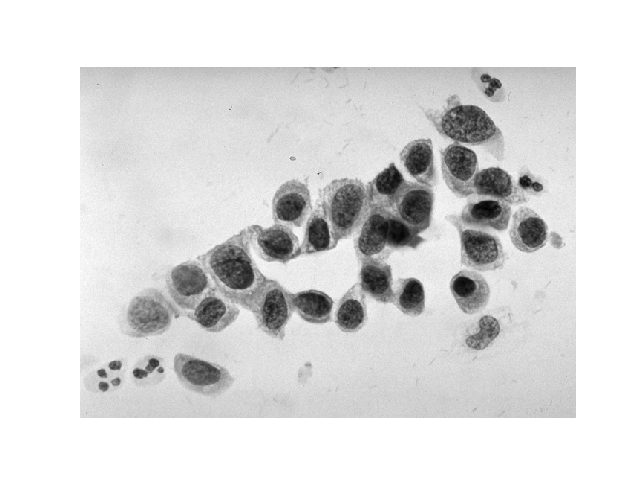

In [4]:
I = cv2.imread('I_celulas.bmp', 0)
Icolor = cv2.imread('Icelulas.bmp', 1)

plt.figure(1)
plt.imshow(I, cmap='gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>


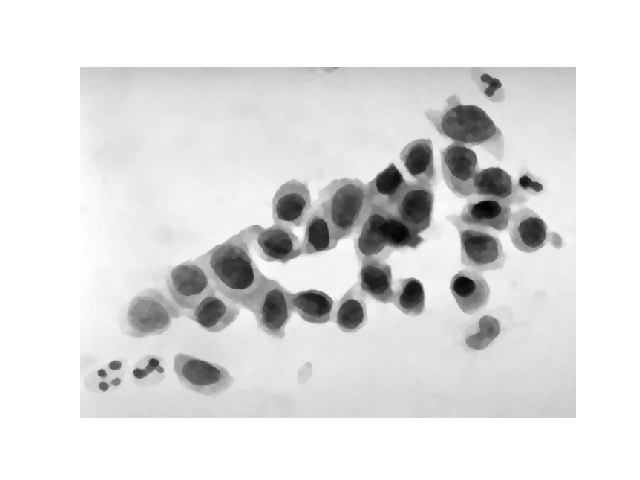

In [5]:
EE1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
EE2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
EE3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))


open1 = cv2.morphologyEx(I, cv2.MORPH_OPEN, EE1)
clos1 = cv2.morphologyEx(open1, cv2.MORPH_CLOSE, EE1)
open2 = cv2.morphologyEx(clos1, cv2.MORPH_OPEN, EE2)
clos2 = cv2.morphologyEx(open2, cv2.MORPH_CLOSE, EE2)
open3 = cv2.morphologyEx(clos2, cv2.MORPH_OPEN, EE3)
I_ASF3 = cv2.morphologyEx(open3, cv2.MORPH_CLOSE, EE3)

plt.figure(2)
plt.imshow(I_ASF3, cmap='gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

In [6]:
print(I_ASF3[268,213])

87


<IPython.core.display.Javascript object>


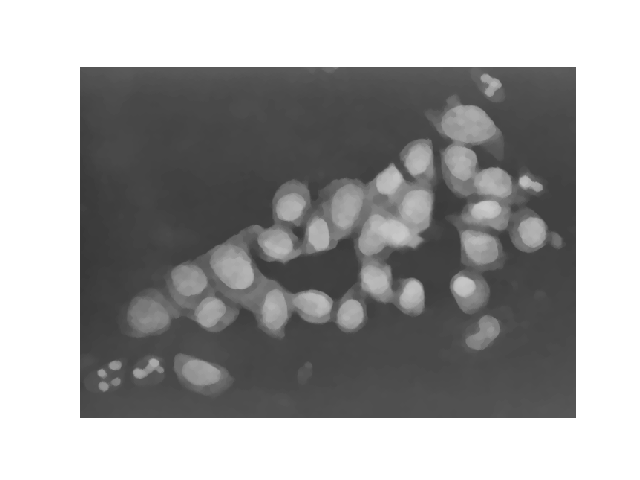

In [7]:
I_neg = 255 - I_ASF3

plt.figure('neg')
plt.imshow(I_neg, cmap='gray', vmin = 0, vmax = 255)
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

[[81 82 82 ... 90 89 89]
 [81 81 81 ... 89 89 88]
 [81 81 81 ... 88 88 88]
 ...
 [74 74 74 ... 85 85 85]
 [75 74 74 ... 86 86 86]
 [75 75 75 ... 86 86 86]]


<IPython.core.display.Javascript object>


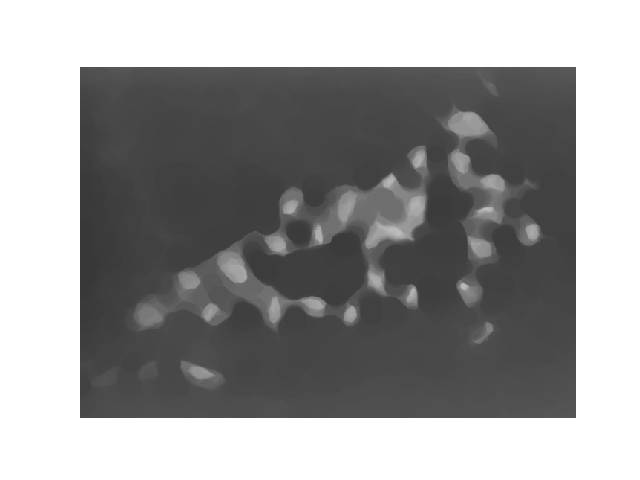

<IPython.core.display.Javascript object>


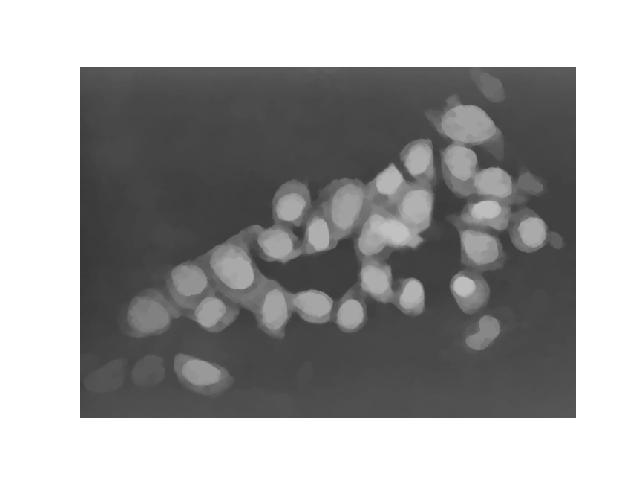

In [18]:
from imreconstruct import imreconstruct

EEnuevo = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (19,19))

I_marker = cv2.erode(I_neg,EEnuevo,iterations = 1)
I_rec = imreconstruct(I_marker, I_neg)

plt.figure('erosion')
plt.imshow(I_marker, cmap='gray', vmin = 0, vmax = 255)
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

plt.figure('reconstruction')
plt.imshow(I_rec, cmap='gray', vmin = 0, vmax = 255)
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>


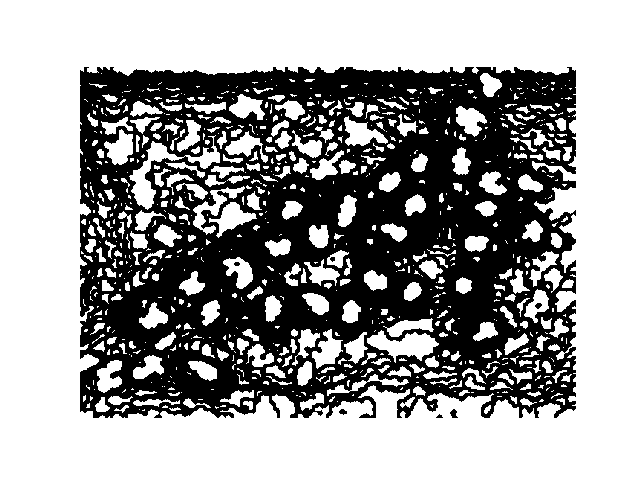

In [19]:
from scipy import ndimage, misc
import matplotlib.pyplot as plt

lm = ndimage.maximum_filter(I_rec, size=(9,9))
msk = np.uint8(I_rec == lm) #// convert local max values to binary mask

plt.figure('local max')
plt.imshow(msk, cmap='gray', vmin = 0, vmax = 1)
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>


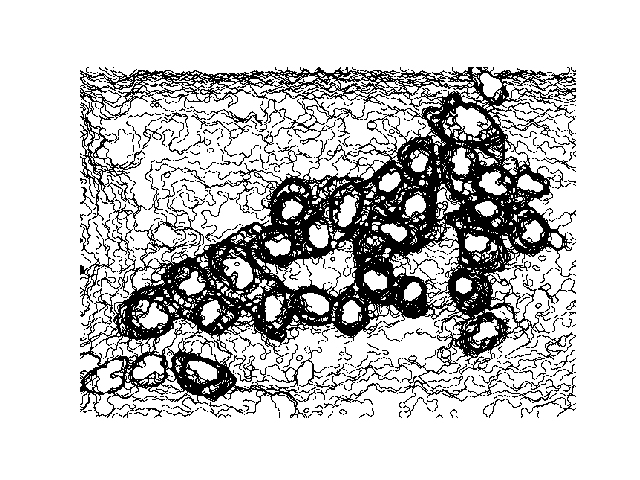

<IPython.core.display.Javascript object>


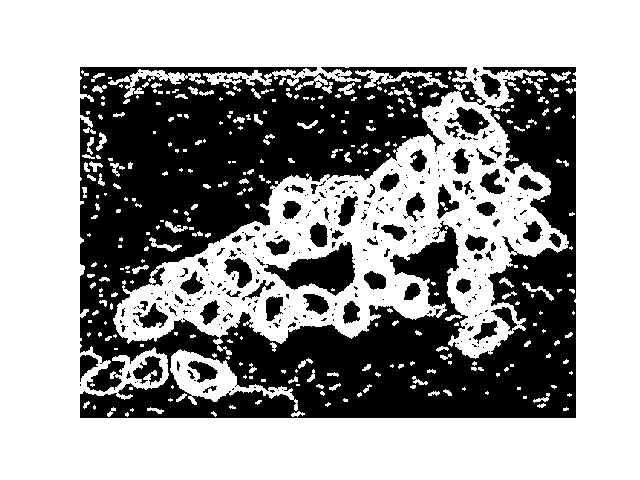

In [21]:
from scipy import ndimage as ndi
from skimage.feature import peak_local_max

conn = np.ones((3,3))
coordinates = peak_local_max(I_rec, footprint=conn, indices=False, exclude_border=0)
lm2 = np.uint8(coordinates)
plt.figure('local max 2')
plt.imshow(lm2, cmap='gray', vmin = 0, vmax = 1)
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

msk = 1-lm2
Estrel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))

msk = cv2.erode(msk,Estrel,iterations = 1)
msk = cv2.dilate(msk, EE2)
plt.figure('eroded and dilated')
plt.imshow(msk, cmap='gray', vmin = 0, vmax = 1)
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>


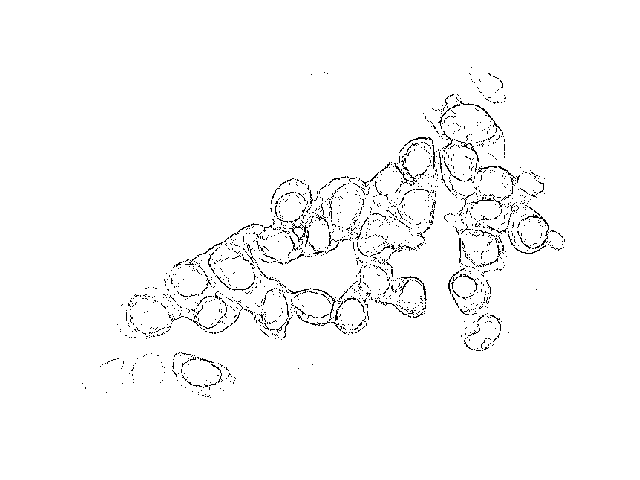

In [11]:
th2 = cv2.adaptiveThreshold(I_rec,1,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,3,2)

plt.figure('threshold')
plt.imshow(th2, cmap='gray', vmin = 0, vmax = 1)
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>


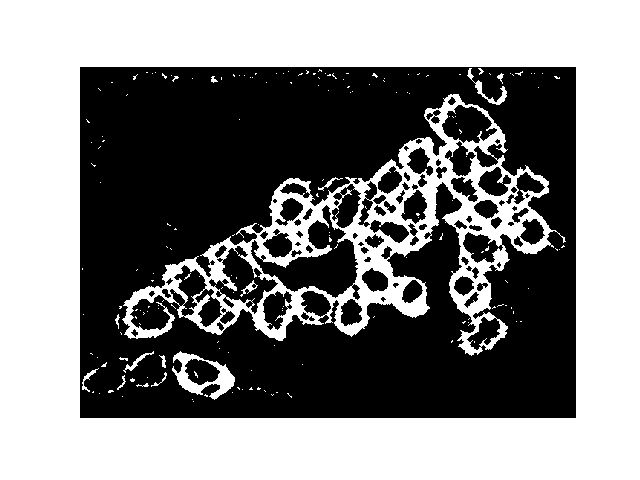

In [16]:
contours, hierarchy = cv2.findContours(msk, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


colored = cv2.drawContours(msk, contours, -1, (0,255,0), 3)
plt.figure('countours')
plt.imshow(colored, cmap='gray', vmin = 0, vmax = 1)
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>


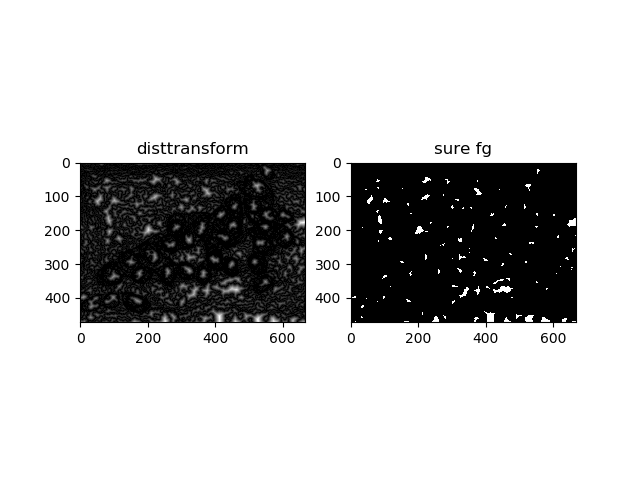

In [22]:


dist_transform = cv2.distanceTransform(lm2,cv2.DIST_L2,5)

ret, sure_fg = cv2.threshold(dist_transform,0.4*dist_transform.max(),255,0)

plt.figure('disttrnsform')
plt.subplot(1,2,1)
plt.title('disttransform')
plt.imshow(dist_transform, cmap = 'gray')

plt.subplot(1,2,2)
plt.title('sure fg')
plt.imshow(sure_fg, cmap = 'gray')

plt.show()
